# Logistic regression

##  What is Logistic regression?  
Reference  
[Stanford CS229 lecture note](http://cs229.stanford.edu/notes/cs229-notes1.pdf)  

As we learned before, we can build linear regression model to explain (or predict) values.  
But what if the objective variable is binary variable (e.g Yes/No, OK/NG, Defect or not)? The binary variable can be converted to 1 and 0 (Yes=1, No=0), so we can build the regression model to predict the 1/0 value. 
But the linear regression model is not a good model anymore because the predicted value can be more than 1 and less than 0.  
We can solve this problem with using "logistic regression".  
  
In logistic regression, we use "Logit function (also known as Sigmoid function)" to convert $\sum_{i}^{n} \beta_{0} + \beta_{i}x_i$ to continuous value between 0 and 1.  
  
The Logit function (aka Sigmoid function) is as below.

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

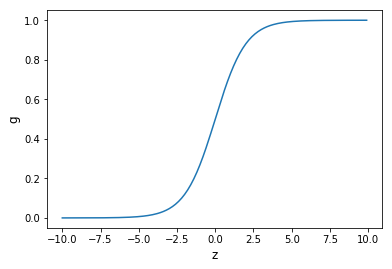

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
z = np.arange(-10,10,0.1)
g = 1/(1 + np.exp(-z))
plt.plot(z, g)
plt.xlabel('z', fontsize=12)
plt.ylabel('g', fontsize=12)
plt.show()

So the Logistic regression can be written as below.  
$$
f(x,\beta) = \frac{1}{1 + e^{- \sum_{k}^{n} \beta_{0} + \beta_{k}x_k}}
$$

Then, how can we find the proper $\beta_{i}$?  
We find them using maximum likehood estimation with a set of probabilistic assumptions.  
Let us assume that
$$
\begin{eqnarray*}
P(y = 1|x;\beta) &=& f(x, \beta)\\
P(y = 0|x;\beta) &=& 1 - f(x, \beta)
\end{eqnarray*}
$$

Note that this can be written more compactly as 
$$
p(y | x; \beta) = (f(x, \beta))^{y}(1 - f(x, \beta))^{1 - y}
$$

Assuming that the n (training examples) were generated independently, we can then write down likehood of the parameters as below.

$$  
\begin{eqnarray*}
\log L(\beta) &=& \log \prod_{i=1}^n p(y_i|x_i; \beta)\\
&=& \log \prod_{i=1}^n (f(x_i, \beta))^{y_i}(1 - f(x_i, \beta))^{1 - y_i}\\
&=& \sum_{i=1}^{n} y_i \log (f(x_i, \beta)) + (1 - y_i) \log (1 - f(x_i, \beta))\\              
\end{eqnarray*}
$$

Next, we maximize the log likehood using gradient descent.  
Before that I explain useful property of the logistic funtion (aka Sigmoid function). It is easy to calculate the derivative as below.

$$  
\begin{eqnarray*}
\frac{d g(z)}{dz} &=& \frac{d}{dz} \frac{1}{1 + e^{-z}}\\
                  &=& \frac{1}{(1 + e^{-z})^2}e^{-z}\\
                  &=& \frac{1}{1 + e^{-z}}\biggl(1 - \frac{1}{1+e^{-z}}\biggr)\\
                  &=& g(z)(1 - g(z))
\end{eqnarray*}
$$  

Using equation above, we can easily calculate the derivative of log likehood function.  
$$
\begin{eqnarray*}
\frac{\partial}{\partial \beta_k} \log{L(\beta)} &=& \biggl(y\frac{1}{f(x,\beta)} - (1 - y)\frac{1}{1-f(x, \beta)}\biggr) \frac{\partial}{\partial \beta_k}f(x,\beta)\\
&=& \biggl(y\frac{1}{f(x,\beta)} - (1 - y)\frac{1}{1-f(x, \beta)}\biggr) f(x,\beta)(1-f(x,\beta))\frac{\partial}{\partial \beta_k}\biggl(\sum_{i}^{n} \beta_{0} + \beta_{i}x_i\biggr)\\
&=& \bigl(y(1-f(x, \beta)) - (1 - y)f(x,\beta) \bigr)x_k\\
&=& \bigl(y - f(x,\beta) \bigr)x_k\\
\end{eqnarray*}
$$

From above, we can set update rule of weight during gradient descent.  
$$
\beta_k := \beta_k + \alpha \bigl(y^i-f(x^i,\beta)\bigr)x_k^i
$$

## Implemantaion of Logistic regression using scikit-lean

In [8]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [9]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from Plot_decision_regions import PlotDecisionRegions 
plot_decision_regions = PlotDecisionRegions.plot_decision_regions

In [13]:
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined = np.hstack([y_train, y_test])

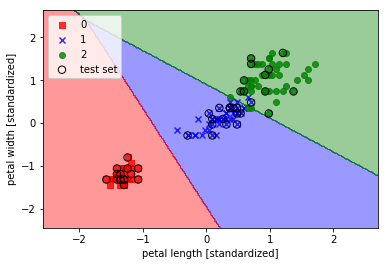

In [14]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150)) 

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')

plt.show()

In [42]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [45]:
print(X_test_std[0,:])
print(X_test_std[0,:].shape)
print(X_test_std[0,:].reshape(-1,1))
print(X_test_std[0,:].reshape(-1,1).shape)

[ 0.70793846  1.50872803]
(2,)
[[ 0.70793846]
 [ 1.50872803]]
(2, 1)


## Implemantaion of Logistic regression using scikit-lean

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from Plot_decision_regions2 import PlotDecisionRegions2 
plot_decision_regions2 = PlotDecisionRegions2.plot_decision_regions2

In [5]:
X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined = np.hstack([y_train, y_test])

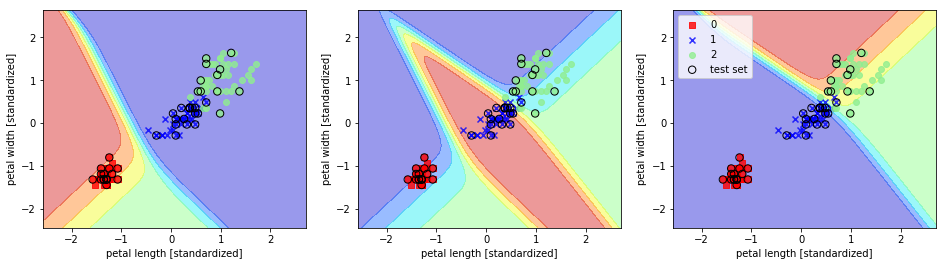

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions2(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150),xlabel='petal length [standardized]',ylabel='petal width [standardized]') 
plt.legend(loc='upper left')
plt.show()